<a href="https://colab.research.google.com/github/bvo4/Project-2/blob/main/bvo4_decision_tree_generator-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/bvo4/TEMP/main/data_upload.csv', on_bad_lines='skip')
print (data)

labels = ['Triple DES', 'AES', 'IDEA', 'SIMON', 'Threefish']
features = ['Age', 'Memory', 'Constraint', 'Security', 'Simple', 'Usage']

unique_values = {
    'Age': ['old', 'new'],
    'Memory': ['yes', 'no'],
    'Constraint':['yes', 'no'],
    'Security': ['Security', 'Speed'],
    'Simple': ['Simple', 'Complex'],
    'Usage': ['Yes', 'No']
}

#print(data.head())
print(data)

    Age Memory Constraint  Security   Simple Usage      Scheme
0   Yes     No         No  Security   Simple   Yes  Triple DES
1   Yes     No        Yes  Security   Simple   Yes  Triple DES
2   Yes    Yes        Yes  Security   Simple   Yes  Triple DES
3   Yes    Yes        Yes     Speed   Simple    No         AES
4   Yes    Yes         No     Speed   Simple   Yes         AES
5   Yes     No         No     Speed   Simple    No         AES
6   Yes    Yes        Yes  Security   Simple   Yes         AES
7   Yes    Yes         No  Security   Simple   Yes         AES
8   Yes     No         No  Security   Simple    No         AES
9    No    Yes        Yes  Security  Complex    No        IDEA
10   No     No        Yes  Security  Complex   Yes        IDEA
11   No    Yes        Yes  Security  Complex   Yes        IDEA
12   No     No        Yes  Security  Complex   Yes        IDEA
13   No     No        Yes  Security  Complex    No        IDEA
14   No    Yes        Yes  Security   Simple    No     

In [ ]:
X_train = data[features]
Y_TRAIN = data['Scheme']

In [ ]:
from dataclasses import dataclass
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def encode_data(data):
  le = preprocessing.LabelEncoder()
  data = data.apply(le.fit_transform)
  return data

# Function to split the dataset
def splitdataset(data):
  
    # Separating the target variable
    X = data.values[:, 0:6]
    Y = data.values[:, 6]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
    return X, Y, X_train, X_test, y_train, y_test

data = encode_data(data)

X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
splitdataset(data)

scheme_mapping = {'3DES': 1, 'AES': 2, 'IDEA': 3, 'Simon': 4,'ThreefishB': 5}

print(y_train)

[0 1 4 3 4 4 2 1 2 2 4 0 2 1 0 4 0]


In [ ]:
from sklearn import tree
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

[Text(0.45454545454545453, 0.9, 'Age <= 0.5\ngini = 0.768\nsamples = 17\nvalue = [4, 3, 4, 1, 5]\nclass = Threefish'),
 Text(0.2727272727272727, 0.7, 'Simple <= 0.5\ngini = 0.594\nsamples = 8\nvalue = [0, 3, 4, 1, 0]\nclass = IDEA'),
 Text(0.18181818181818182, 0.5, 'Security <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 0, 1, 0]\nclass = AES'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0]\nclass = AES'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]\nclass = SIMON'),
 Text(0.36363636363636365, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0]\nclass = IDEA'),
 Text(0.6363636363636364, 0.7, 'Simple <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 0, 0, 0, 5]\nclass = Threefish'),
 Text(0.5454545454545454, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = Threefish'),
 Text(0.7272727272727273, 0.5, 'Usage <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 0, 0, 0, 2]\nclass = Triple DES'),
 Text(0.63

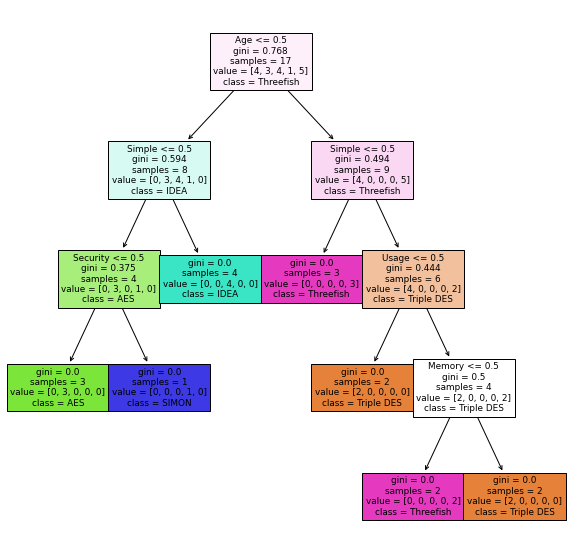

In [ ]:
from matplotlib import pyplot as plt
fix, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=features, class_names=labels, ax=ax, filled=True)

In [ ]:
import anvil.server

anvil.server.connect("NNAOYGE3VS22G3O4NAXBSDON-PGO42YOCZH2TKJSD")

@anvil.server.callable
def say_hello(name):
  print("Hello from the uplink, %s!" % name)

@anvil.server.callable
def import_data():
  data = pd.read_csv('https://raw.githubusercontent.com/bvo4/TEMP/main/data_upload.csv', on_bad_lines='skip')
  print (data)

  labels = ['Triple DES', 'AES', 'IDEA', 'SIMON', 'Threefish']
  features = ['Age', 'Memory', 'Constraint', 'Security', 'Simple', 'Usage']

  unique_values = {
      'Age': ['old', 'new'],
      'Memory': ['yes', 'no'],
      'Constraint':['yes', 'no'],
      'Security': ['Security', 'Speed'],
      'Simple': ['Simple', 'Complex'],
      'Usage': ['Yes', 'No']
  }
  return data


anvil.server.wait_forever()